In [164]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/snsd-tickets-analysis/girlgeneration(utf8)(1).csv


In [165]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('../input/snsd-tickets-analysis/girlgeneration(utf8)(1).csv')

In [166]:
df.rename(columns={'T_STANDARD_TICKET_TYPE_NAME':'TICKET_TYPE','SEAT_REGION_NAME':'SEAT_TYPE'},inplace=True)

In [167]:
df.head(2)

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,PROGRAM_ID,PROGRAM_NAME,CREATE_DATE,PLAY_DATE,PLAY_TIME,...,SHIPPING_COUNTRY_ID1,SHIPPING_TOWN_ID1,RECEIPT_TITLE,SHIPPING_COUNTRY_ID2,SHIPPING_TOWN_ID2,SHIPPING_ZIP2,ORDER_NUM,TICKET_ENTRANCE_NO,SEX,ADDRESS
0,331,26237,52196,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/14 p.m. 11:25:58.,2010/10/17,15:00,...,1,10,NaN,5,61,300.0,26237,0,male,2103
1,332,26237,52195,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/14 p.m. 11:25:58.,2010/10/17,15:00,...,1,10,NaN,5,61,300.0,26237,0,male,2103


In [168]:
df['CREATE_DATE']

0       2010/10/14 p.m. 11:25:58.
1       2010/10/14 p.m. 11:25:58.
2        2010/9/18 p.m. 11:26:37.
3        2010/9/18 p.m. 11:26:37.
4        2010/9/18 p.m. 11:28:56.
                  ...            
7064     2010/10/9 p.m. 01:46:11.
7065     2010/10/9 p.m. 01:46:11.
7066     2010/10/9 p.m. 01:20:40.
7067     2010/10/9 p.m. 01:20:40.
7068    2010/10/13 a.m. 12:17:56.
Name: CREATE_DATE, Length: 7069, dtype: object

In [169]:
# Data Processing - convert wrong date time format to the correct one

# Replace "." with empty space in CREATE_DATE and copy data to MY_DATE
df['MY_DATE'] = df.CREATE_DATE.str.replace('.', '', regex=False)

# Apply datetime object with correct format to MY_DATE
df['MY_DATE'] = pd.to_datetime(df['MY_DATE'].str.strip(), format='%Y/%m/%d %p %I:%M:%S')

In [170]:
#我要create date時間,檢查修改好的時間格式
df['MY_DATE']

0      2010-10-14 23:25:58
1      2010-10-14 23:25:58
2      2010-09-18 23:26:37
3      2010-09-18 23:26:37
4      2010-09-18 23:28:56
               ...        
7064   2010-10-09 13:46:11
7065   2010-10-09 13:46:11
7066   2010-10-09 13:20:40
7067   2010-10-09 13:20:40
7068   2010-10-13 00:17:56
Name: MY_DATE, Length: 7069, dtype: datetime64[ns]

In [171]:
print(type(df['MY_DATE'])) #Series

<class 'pandas.core.series.Series'>


In [172]:
#排序時間
df['MY_DATE']=df['MY_DATE'].apply(pd.to_datetime)
df=df.sort_values(by=['MY_DATE'],ascending=True)

In [173]:
df['MY_DATE']

6430   2010-09-18 13:18:55
6652   2010-09-18 13:22:33
6651   2010-09-18 13:22:33
6650   2010-09-18 13:22:33
6653   2010-09-18 13:22:33
               ...        
6969   2010-10-14 23:37:17
1972   2010-10-14 23:45:15
1971   2010-10-14 23:45:15
6977   2010-10-14 23:59:15
6978   2010-10-14 23:59:15
Name: MY_DATE, Length: 7069, dtype: datetime64[ns]

In [174]:
emp_list1=[]
inv=np.arange(0,3318,20)
for date in df['MY_DATE']:
    emp_list1.append(date)
    #print(date) #幾乎都是9/18
for num in inv:
    #print(emp_list1[num])
    pass

In [175]:
#分區後再將時間取unique,在做排序,就可以得到每一區的x-axis


In [176]:
df_all=df[['SEAT_TYPE','MY_DATE']].sort_values(by='SEAT_TYPE').head(10)

In [177]:
df_all.sort_index(ascending=True)

,SEAT_TYPE,MY_DATE
606,Floor2Sectionpurple2B,2010-09-18 18:38:38
607,Floor2Sectionpurple2B,2010-09-18 18:38:38
1250,Floor2Sectionpurple2B,2010-09-18 19:29:28
1627,Floor2Sectionpurple2B,2010-09-18 22:21:46
1628,Floor2Sectionpurple2B,2010-09-18 22:21:46
3617,Floor2Sectionpurple2B,2010-09-18 18:18:13
3618,Floor2Sectionpurple2B,2010-09-18 18:18:13
4636,Floor2Sectionpurple2B,2010-09-18 16:53:34
4637,Floor2Sectionpurple2B,2010-09-18 16:53:34
4638,Floor2Sectionpurple2B,2010-09-18 16:53:34


In [178]:
df_label=df[['SEAT_TYPE','MY_DATE']].sort_values(by='SEAT_TYPE')
for i in df_label.iteritems(): #dataframe
    print(i)

('SEAT_TYPE', 3617    Floor2Sectionpurple2B
4637    Floor2Sectionpurple2B
607     Floor2Sectionpurple2B
606     Floor2Sectionpurple2B
1628    Floor2Sectionpurple2B
                ...          
2058     FloorB1FloorSectionD
2057     FloorB1FloorSectionD
6230     FloorB1FloorSectionD
1398     FloorB1FloorSectionD
6153     FloorB1FloorSectionD
Name: SEAT_TYPE, Length: 7069, dtype: object)
('MY_DATE', 3617   2010-09-18 18:18:13
4637   2010-09-18 16:53:34
607    2010-09-18 18:38:38
606    2010-09-18 18:38:38
1628   2010-09-18 22:21:46
               ...        
2058   2010-09-18 18:14:57
2057   2010-09-18 18:14:57
6230   2010-09-18 15:34:09
1398   2010-09-18 18:20:00
6153   2010-09-18 18:21:24
Name: MY_DATE, Length: 7069, dtype: datetime64[ns])


In [192]:
df_s_m=df.groupby(['SEAT_TYPE','MY_DATE'])
seattype=[]
len_i_list=[]
time_series=[]

Floor2Sectionpurple2B_date=[]
for i in df_s_m:
    #print(i) # i會印出好長一串,因此i[0]會 得到('Floor2Sectionpurple2B', Timestamp('2010-09-18 13:39:48') / 
    # 然後這是一個tuple ,i[0][0]會得到 'Floor2sectionPurple2B',i[0][1]得到Timestamp,
    #print(i[0][0],'/',i[0][1],len(i[1])) #zones & date & number of ticks sales
    seattype.append(i[0][0])
    len_i_list.append(len(i[1]))
    time_series.append(i[0][1])
#Floor2Sectionpurple2B total sale:142張票,但要看要有一個時間線

In [198]:
#要取得27區的時間
time_list=[]
for i in df_s_m:
    #print(i[0][0],'/',i[0][1]) #zones & date
    if i[0][0]=='Floor2Sectionpurple2B':
        time_list.append(i[0][1])
print(time_list)

[Timestamp('2010-09-18 13:39:48'), Timestamp('2010-09-18 14:44:33'), Timestamp('2010-09-18 15:19:04'), Timestamp('2010-09-18 15:27:58'), Timestamp('2010-09-18 15:38:05'), Timestamp('2010-09-18 15:45:19'), Timestamp('2010-09-18 16:05:54'), Timestamp('2010-09-18 16:13:46'), Timestamp('2010-09-18 16:26:17'), Timestamp('2010-09-18 16:41:22'), Timestamp('2010-09-18 16:47:31'), Timestamp('2010-09-18 16:50:10'), Timestamp('2010-09-18 16:53:34'), Timestamp('2010-09-18 16:53:41'), Timestamp('2010-09-18 16:55:47'), Timestamp('2010-09-18 16:56:10'), Timestamp('2010-09-18 17:02:21'), Timestamp('2010-09-18 17:07:36'), Timestamp('2010-09-18 17:10:39'), Timestamp('2010-09-18 17:20:20'), Timestamp('2010-09-18 17:22:15'), Timestamp('2010-09-18 17:29:34'), Timestamp('2010-09-18 17:34:40'), Timestamp('2010-09-18 17:50:11'), Timestamp('2010-09-18 17:55:39'), Timestamp('2010-09-18 17:55:55'), Timestamp('2010-09-18 17:58:47'), Timestamp('2010-09-18 18:03:04'), Timestamp('2010-09-18 18:14:54'), Timestamp('20

In [ ]:
# 抓取所有seattype
print(type(seattype))
#print(seattype) 結果是一個seattype list
#要使用count計算必須轉換成string
seattype=" ".join(str(x) for x in seattype)
print(type(seattype))

In [ ]:
# Get total number of ticket for each SEAT_TYPE
count = df.groupby('SEAT_TYPE').size()
dfSeatTypeCount = count.to_frame(name='COUNTS').reset_index()
dfSeatTypeCount = dfSeatTypeCount.sort_values(by='COUNTS', ascending=True)
print(dfSeatTypeCount)
#Floor2Sectionpurple2B

In [ ]:
df.groupby('SEAT_TYPE').size()

In [ ]:
#各區zone出現的次數 #  seattype.count('')
print('Floor2Sectionpurple2B:',seattype.count('Floor2Sectionpurple2B'))
print('Floor2Sectionpurple2C:',seattype.count('Floor2Sectionpurple2C'))
print('Floor2Sectionpurple2D:',seattype.count('Floor2Sectionpurple2D'))
print('Floor2Sectionpurple2E:',seattype.count('Floor2Sectionpurple2E'))
print('Floor2Sectionred2B:',seattype.count('Floor2Sectionred2B'))
print('Floor2Sectionred2C:',seattype.count('Floor2Sectionred2C'))
print('Floor2Sectionred2D:',seattype.count('Floor2Sectionred2D'))
print('Floor2Sectionred2E:',seattype.count('Floor2Sectionred2E'))
print('Floor2Sectionyellow2A:',seattype.count('Floor2Sectionyellow2A'))
print('Floor2Sectionyellow2B:',seattype.count('Floor2Sectionyellow2B'))
print('Floor2Sectionyellow2C:',seattype.count('Floor2Sectionyellow2C'))
print('Floor2Sectionyellow2D:',seattype.count('Floor2Sectionyellow2D'))
print('Floor2Sectionyellow2E:',seattype.count('Floor2Sectionyellow2E'))
print('Floor3Sectionyellow3A:',seattype.count('Floor3Sectionyellow3A'))
print('Floor3Sectionyellow3B:',seattype.count('Floor3Sectionyellow3B'))
print('Floor3Sectionyellow3C:',seattype.count('Floor3Sectionyellow3C'))
print('Floor3Sectionyellow3D:',seattype.count('Floor3Sectionyellow3D'))
print('Floor3Sectionyellow3E:',seattype.count('Floor3Sectionyellow3E'))
print('Floor3Sectionyellow3F:',seattype.count('Floor3Sectionyellow3F'))
print('Floor3Sectionyellow3G:',seattype.count('Floor3Sectionyellow3G'))
print('Floor3Sectionyellow3H:',seattype.count('Floor3Sectionyellow3H'))
print('Floor3Sectionyellow3I:',seattype.count('Floor3Sectionyellow3I'))
print('Floor3Sectionyellow3J:',seattype.count('Floor3Sectionyellow3J'))
print('FloorB1FloorSectionA:',seattype.count('FloorB1FloorSectionA'))
print('FloorB1FloorSectionB:',seattype.count('FloorB1FloorSectionB'))
print('FloorB1FloorSectionC:',seattype.count('FloorB1FloorSectionC'))
print('FloorB1FloorSectionD:',seattype.count('FloorB1FloorSectionD'))

In [ ]:
#print(len_i_list)
#print(len(len_i_list))

## Floor2Sectionpurple2[B,C,D,E]
Floor2Sectionpurple2B: 69  
Floor2Sectionpurple2C: 94  
Floor2Sectionpurple2D: 67  
Floor2Sectionpurple2E: 122  

In [ ]:
#Floor2Sectionpurple2B 票數銷售時間狀況
Floor2Sectionpurple2B_time_series=(len_i_list[:69]) # Floor2Sectionpurple2B_time_series,隨著時間線,票數銷售的情況
print(type(Floor2Sectionpurple2B_time_series))
print(Floor2Sectionpurple2B_time_series)
#Floor2Sectionpurple2C 票數銷售時間狀況
Floor2Sectionpurple2C_time_series=(len_i_list[69:163])
#Floor2Sectionpurple2D 票數銷售時間狀況
Floor2Sectionpurple2D_time_series=(len_i_list[163:230])
#Floor2Sectionpurple2E 票數銷售時間狀況
Floor2Sectionpurple2E_time_series=(len_i_list[230:352])

total=0
for num in Floor2Sectionpurple2B_time_series:
    total+=num
print(total)

In [ ]:
y0=np.array(Floor2Sectionpurple2B_time_series) 
y1=np.array(Floor2Sectionpurple2C_time_series)
y2=np.array(Floor2Sectionpurple2D_time_series)
y3=np.array(Floor2Sectionpurple2E_time_series)

In [ ]:
fig, ax = plt.subplots(2,2,constrained_layout = True,figsize=(10,10))
ax[0,0].set_title('Floor2Sectionpurple2B',fontsize='xx-large')
ax[0,0].plot(y0,c='mediumslateblue',marker='')
ax[0,1].set_title('Floor2Sectionpurple2C',fontsize='xx-large')
ax[0,1].plot(y1,c='mediumpurple',marker='')
ax[1,0].set_title('Floor2Sectionpurple2D',fontsize='xx-large')
ax[1,0].plot(y2,c='rebeccapurple',marker='')
ax[1,1].set_title('Floor2Sectionpurple2E',fontsize='xx-large')
ax[1,1].plot(y3,c='blueviolet',marker='')

## Floor2Sectionred2[B,C,D,E]  
Floor2Sectionred2B: 67  
Floor2Sectionred2C: 101  
Floor2Sectionred2D: 81  
Floor2Sectionred2E: 144

In [ ]:
Floor2Sectionred2B_time_series=(len_i_list[352:419])
Floor2Sectionred2C_time_series=(len_i_list[419:520])
Floor2Sectionred2D_time_series=(len_i_list[520:601])
Floor2Sectionred2E_time_series=(len_i_list[601:745])

In [ ]:
y0=np.array(Floor2Sectionred2B_time_series)
y1=np.array(Floor2Sectionred2C_time_series)
y2=np.array(Floor2Sectionred2D_time_series)
y3=np.array(Floor2Sectionred2E_time_series)

In [ ]:
fig, ax = plt.subplots(2,2,constrained_layout = True,figsize=(10,10))
ax[0,0].set_title('Floor2Sectionpurple2B',fontsize='xx-large')
ax[0,0].plot(y0,c='red')
ax[0,1].set_title('Floor2Sectionpurple2C',fontsize='xx-large')
ax[0,1].plot(y1,c='salmon')
ax[1,0].set_title('Floor2Sectionpurple2D',fontsize='xx-large')
ax[1,0].plot(y2,c='tomato')
ax[1,1].set_title('Floor2Sectionpurple2E',fontsize='xx-large')
ax[1,1].plot(y3,c='coral')

## Floor2Sectionyellow2[A~E]  
Floor2Sectionyellow2A: 87  
Floor2Sectionyellow2B: 100  
Floor2Sectionyellow2C: 66  
Floor2Sectionyellow2D: 106  
Floor2Sectionyellow2E: 116  

In [180]:
Floor2Sectionyellow2A_time_series=(len_i_list[745:832])
Floor2Sectionyellow2B_time_series=(len_i_list[832:932])
Floor2Sectionyellow2C_time_series=(len_i_list[932:998])
Floor2Sectionyellow2D_time_series=(len_i_list[998:1104])
Floor2Sectionyellow2E_time_series=(len_i_list[1104:1220])

In [181]:
y0=np.array(Floor2Sectionyellow2A_time_series)
y1=np.array(Floor2Sectionyellow2B_time_series)
y2=np.array(Floor2Sectionyellow2C_time_series)
y3=np.array(Floor2Sectionyellow2D_time_series)
y4=np.array(Floor2Sectionyellow2E_time_series)

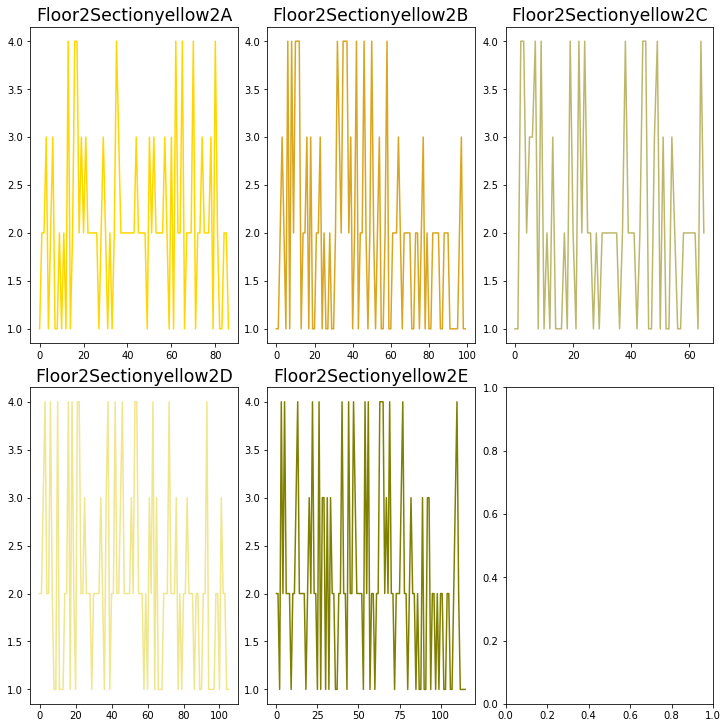

In [182]:
fig, ax = plt.subplots(2,3,constrained_layout = True,figsize=(10,10))
ax[0,0].set_title('Floor2Sectionyellow2A',fontsize='xx-large')
ax[0,0].plot(y0,c='gold')
ax[0,1].set_title('Floor2Sectionyellow2B',fontsize='xx-large')
ax[0,1].plot(y1,c='goldenrod')
ax[0,2].set_title('Floor2Sectionyellow2C',fontsize='xx-large')
ax[0,2].plot(y2,c='darkkhaki')
ax[1,0].set_title('Floor2Sectionyellow2D',fontsize='xx-large')
ax[1,0].plot(y3,c='khaki')
ax[1,1].set_title('Floor2Sectionyellow2E',fontsize='xx-large')
ax[1,1].plot(y4,c='olive')

## Floor3Sectionyellow3[A~J]
Floor3Sectionyellow3A: 19  
Floor3Sectionyellow3B: 96  
Floor3Sectionyellow3C: 210  
Floor3Sectionyellow3D: 199  
Floor3Sectionyellow3E: 79  
Floor3Sectionyellow3F: 97  
Floor3Sectionyellow3G: 241  
Floor3Sectionyellow3H: 218  
Floor3Sectionyellow3I: 91  
Floor3Sectionyellow3J: 21  

In [183]:
Floor3Sectionyellow3A_time_series=(len_i_list[1220:1239])
Floor3Sectionyellow3B_time_series=(len_i_list[1239:1335])
Floor3Sectionyellow3C_time_series=(len_i_list[1335:1545])
Floor3Sectionyellow3D_time_series=(len_i_list[1545:1744])

Floor3Sectionyellow3E_time_series=(len_i_list[1744:1823])
Floor3Sectionyellow3F_time_series=(len_i_list[1823:1920])
Floor3Sectionyellow3G_time_series=(len_i_list[1920:2161])
Floor3Sectionyellow3H_time_series=(len_i_list[2161:2379])

Floor3Sectionyellow3I_time_series=(len_i_list[2379:2470])
Floor3Sectionyellow3J_time_series=(len_i_list[2470:2491])

In [184]:
y0=np.array(Floor3Sectionyellow3A_time_series)
y1=np.array(Floor3Sectionyellow3B_time_series)
y2=np.array(Floor3Sectionyellow3C_time_series)
y3=np.array(Floor3Sectionyellow3D_time_series)

y4=np.array(Floor3Sectionyellow3E_time_series)
y5=np.array(Floor3Sectionyellow3F_time_series)
y6=np.array(Floor3Sectionyellow3G_time_series)
y7=np.array(Floor3Sectionyellow3H_time_series)

y8=np.array(Floor3Sectionyellow3I_time_series)
y9=np.array(Floor3Sectionyellow3J_time_series)

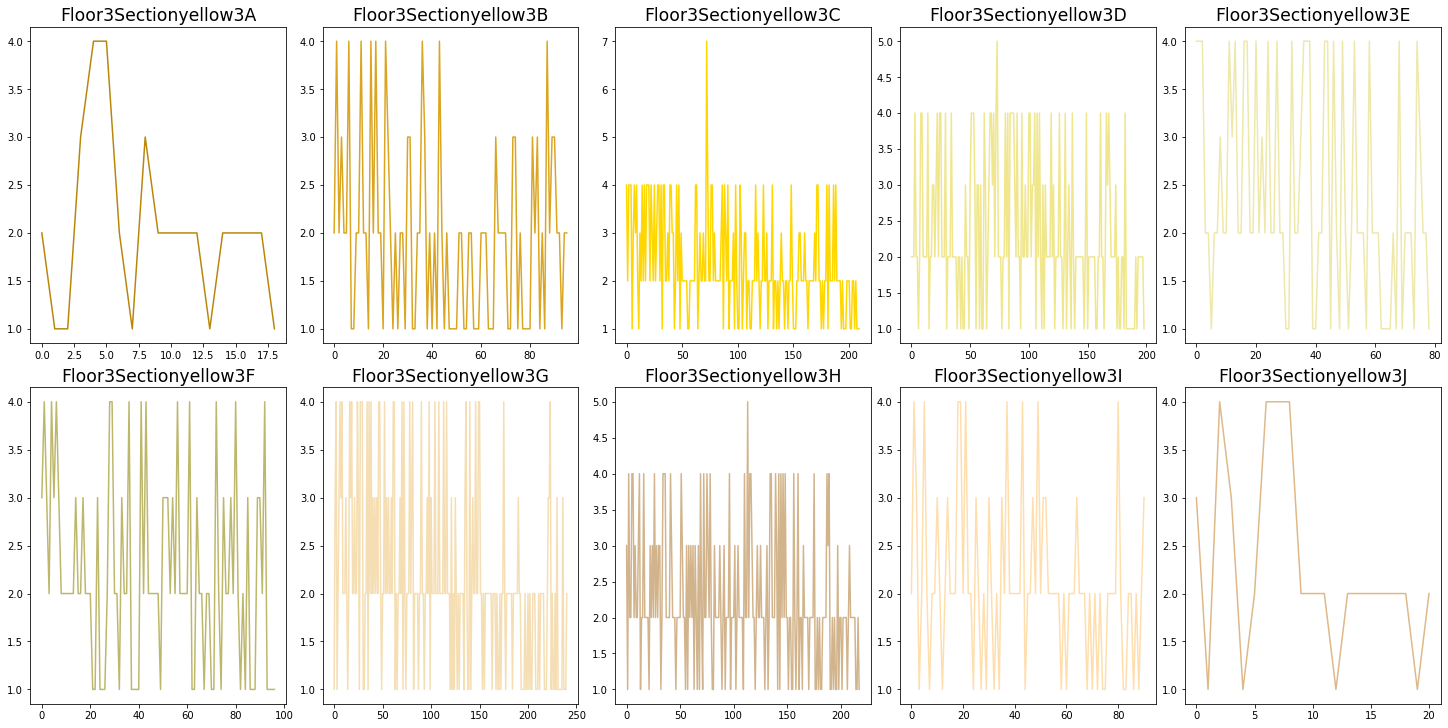

In [185]:
fig, ax = plt.subplots(2,5,constrained_layout = True,figsize=(20,10))
ax[0,0].set_title('Floor3Sectionyellow3A',fontsize='xx-large')
ax[0,0].plot(y0,c='darkgoldenrod')

ax[0,1].set_title('Floor3Sectionyellow3B',fontsize='xx-large')
ax[0,1].plot(y1,c='goldenrod')

ax[0,2].set_title('Floor3Sectionyellow3C',fontsize='xx-large')
ax[0,2].plot(y2,c='gold')

ax[0,3].set_title('Floor3Sectionyellow3D',fontsize='xx-large')
ax[0,3].plot(y3,c='khaki')

ax[0,4].set_title('Floor3Sectionyellow3E',fontsize='xx-large')
ax[0,4].plot(y4,c='palegoldenrod')

ax[1,0].set_title('Floor3Sectionyellow3F',fontsize='xx-large')
ax[1,0].plot(y5,c='darkkhaki')

ax[1,1].set_title('Floor3Sectionyellow3G',fontsize='xx-large')
ax[1,1].plot(y6,c='wheat')

ax[1,2].set_title('Floor3Sectionyellow3H',fontsize='xx-large')
ax[1,2].plot(y7,c='tan')

ax[1,3].set_title('Floor3Sectionyellow3I',fontsize='xx-large')
ax[1,3].plot(y8,c='navajowhite')

ax[1,4].set_title('Floor3Sectionyellow3J',fontsize='xx-large')
ax[1,4].plot(y9,c='burlywood')

## FloorB1FloorSection[A~D]  
FloorB1FloorSectionA: 259  
FloorB1FloorSectionB: 219  
FloorB1FloorSectionC: 182  
FloorB1FloorSectionD: 168

In [186]:
FloorB1FloorSectionA_time_series=(len_i_list[2491:2750])
FloorB1FloorSectionB_time_series=(len_i_list[2750:2969])
FloorB1FloorSectionC_time_series=(len_i_list[2969:3150])
FloorB1FloorSectionD_time_series=(len_i_list[3151:3319])

In [187]:
np.array(FloorB1FloorSectionC_time_series)

array([2, 2, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 1, 6, 3, 4,
       2, 2, 4, 4, 4, 2, 2, 2, 1, 2, 4, 4, 1, 1, 2, 2, 2, 1, 1, 2, 1, 4,
       1, 1, 4, 3, 2, 2, 1, 3, 1, 2, 2, 3, 3, 4, 4, 4, 2, 2, 2, 2, 1, 1,
       4, 2, 2, 1, 1, 3, 3, 2, 1, 3, 2, 4, 4, 2, 2, 1, 4, 2, 3, 1, 4, 2,
       1, 2, 4, 4, 2, 2, 1, 2, 2, 2, 4, 1, 2, 1, 2, 2, 1, 1, 3, 1, 3, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 3, 3, 2, 4, 1, 4, 2, 1, 2, 2, 4, 4, 3, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 4, 3, 1, 2, 2, 2,
       2, 1, 2, 3, 1, 1, 2, 2, 4, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 2])

In [188]:
np.array(FloorB1FloorSectionD_time_series).shape

(168,)

In [189]:
y0=np.array(FloorB1FloorSectionA_time_series)
y1=np.array(FloorB1FloorSectionB_time_series)
y2=np.array(FloorB1FloorSectionC_time_series)
y3=np.array(FloorB1FloorSectionD_time_series)

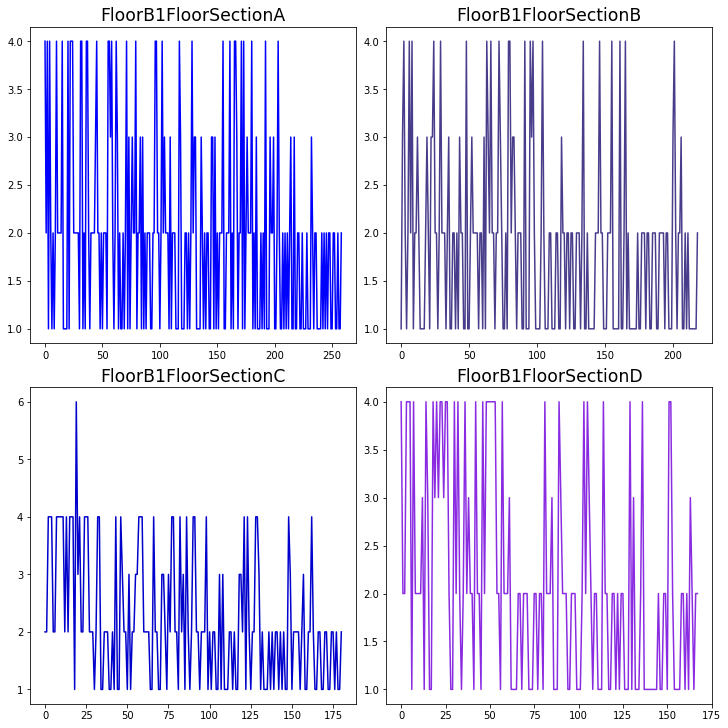

In [190]:
fig, ax = plt.subplots(2,2,constrained_layout = True,figsize=(10,10))
ax[0,0].set_title('FloorB1FloorSectionA',fontsize='xx-large')
ax[0,0].plot(y0,c='blue')

ax[0,1].set_title('FloorB1FloorSectionB',fontsize='xx-large')
ax[0,1].plot(y1,c='darkslateblue')

ax[1,0].set_title('FloorB1FloorSectionC',fontsize='xx-large')
ax[1,0].plot(y2,c='mediumblue')

ax[1,1].set_title('FloorB1FloorSectionD',fontsize='xx-large')
ax[1,1].plot(y3,c='blueviolet')
plt.savefig('my_image.png')
plt.show()